# Optimizing variables over transition rate


In this notebook we are going to implement the method presented in Mouaffac within folie

In [36]:
import numpy as np
import folie as fl
import matplotlib.pyplot as plt
import pytorch

ModuleNotFoundError: No module named 'pytorch'

In [13]:
# Define model to simulate and type of simulator to use
dt = 1e-3

potential=fl.functions.MullerBrown()
diff_function = fl.functions.Polynomial(deg=0, coefficients=np.asarray([0.5]) * np.eye(2, 2))
model_simu = fl.models.overdamped.Overdamped(force=potential, diffusion=diff_function)


(36, 36) (36, 36)


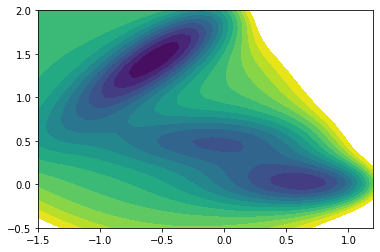

In [24]:
x = np.linspace(-1.5, 1.2, 36)
y = np.linspace(-0.5, 2.0, 36)

X, Y = np.meshgrid(x, y)
print(X.shape, Y.shape)

# Plot potential surface
pot = potential.potential_plot(X, Y)
fig = plt.figure()
ax = plt.axes()
ax.contourf(X, Y, pot-np.min(pot), levels=np.linspace(0,50,15))


Lets run some simulations of the model. We launch simulations from the transition state to obtain a full sampling of the transition.

In [34]:
simulator = fl.simulations.Simulator(fl.simulations.EulerStepper(model_simu), dt)

# initialize positions
ntraj = 30
q0 = np.empty(shape=[ntraj, 2])
for i in range(ntraj):
    q0[i,:] = [-0.90,0.500]

# Calculate Trajectory
time_steps = 20000
data = simulator.run(time_steps, q0, save_every=1)


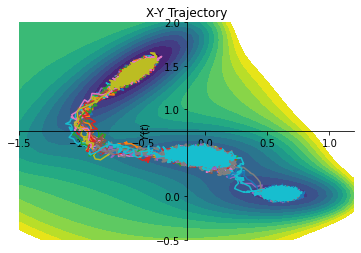

In [35]:

# Plot the resulting trajectories
fig, axs = plt.subplots()
axs.contourf(X, Y, pot-np.min(pot), levels=np.linspace(0,50,15))
for n, trj in enumerate(data):
    axs.plot(trj["x"][:, 0], trj["x"][:, 1])
    axs.spines["left"].set_position("center")
    axs.spines["right"].set_color("none")
    axs.spines["bottom"].set_position("center")
    axs.spines["top"].set_color("none")
    axs.xaxis.set_ticks_position("bottom")
    axs.yaxis.set_ticks_position("left")
    axs.set_xlabel("$X(t)$")
    axs.set_ylabel("$Y(t)$")
    axs.set_title("X-Y Trajectory")
    axs.grid()

Next step is to define a projection of the trajectories onto a 1d coordinate

In [ ]:
#initialization
input_size = 2
output_size = 1
N_neurons = [10,40]
model = Ruggedmueller2(input_size,N_neurons[1],output_size)

size1,size2 = train_data.shape
rhs = torch.zeros(size1,)
train_ds = TensorDataset(train_data,rhs)
batch_size = int(size1/125) # the batch size is the size of the training data


loss_fn = nn.L1Loss()

train_dl = DataLoader(train_ds, batch_size, shuffle=True)
optimizer1 = optim.Adam(model.parameters(), lr=1e-4)

beta = torch.tensor(1/10)

   

We can now run the optimisation

In [ ]:
 for epoch in range(1000):
        for X,y in train_dl:
            optimizer1.zero_grad()
            chia,chib = utils.chiAB(X)
            q_tilde = model(X)
            Q = utils.q_theta(X,chia,chib,q_tilde)
            U = utils.funU(X[:,0],X[:,1])
            derivQ = torch.autograd.grad(Q,X,allow_unused=True, retain_graph=True, 
                                         grad_outputs = torch.ones_like(Q),create_graph=True)
            output = (torch.norm(derivQ[0],dim=1)**2)*torch.exp(-beta*U)
            loss = loss_fn(output, y)

            loss.backward()
            optimizer1.step()

        if epoch % 100 == 1:
            print('loss at epoch {} is {:.4f}'.format(epoch, loss))

For comparison, a computation of the committor can be done